<a href="https://colab.research.google.com/github/vjmiyagi/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/Module4/VJM_LS_DS_134_Clustering_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering

# 1) Use the "Breast Cancer Wisconsin (Diagnostic) Data Set" from Kaggle to try and cluster types of cancer cells. 

Here's the original dataset for your reference:

<https://www.kaggle.com/uciml/breast-cancer-wisconsin-data>

## This is a supervised learning dataset

(Because it has **labels** - The "diagnosis" column.)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA # You don't necessarily have to use this
from sklearn.cluster import KMeans # You don't necessarily have to use this
from sklearn.preprocessing import StandardScaler # You don't necessarily have to use this
import seaborn as sns; sns.set(style='ticks', color_codes=True)

df = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/Cancer_Cells.csv")
print(df.shape)
df.head()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


(569, 33)


id diagnosis  ...  fractal_dimension_worst  Unnamed: 32
0    842302         M  ...                  0.11890          NaN
1    842517         M  ...                  0.08902          NaN
2  84300903         M  ...                  0.08758          NaN
3  84348301         M  ...                  0.17300          NaN
4  84358402         M  ...                  0.07678          NaN

[5 rows x 33 columns]

In [3]:
# Grabbing diagnosis for later use
df_diag = df['diagnosis']

df_diag.replace({'M':1,'B':0},inplace=True)
df_diag.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

## Now it's an unsupervised learning dataset

(Because we've removed the diagnosis label) - Use this version.

## Let's do it!

- You might want to do some data exploration to see if you can find specific columns that will help you find distinct clusters of cells
- You might want to use the elbow method to decide on the number of clusters to use.


In [0]:
df = df.drop('diagnosis', axis=1)
print(df.shape)
df.head()

In [0]:
# Some column name cleanup and dropping id and unnamed columns

df = df.rename(columns={'concave points_mean':'concave_points_mean','concave points_se':'concave_points_se','concave points_worst':'concave_points_worst', 'Unnamed: 32':'Unnamed'})
df = df.drop('Unnamed',axis=1)
df = df.drop('id', axis=1)

In [34]:
df.head()

radius_mean  texture_mean  ...  symmetry_worst  fractal_dimension_worst
0        17.99         10.38  ...          0.4601                  0.11890
1        20.57         17.77  ...          0.2750                  0.08902
2        19.69         21.25  ...          0.3613                  0.08758
3        11.42         20.38  ...          0.6638                  0.17300
4        20.29         14.34  ...          0.2364                  0.07678

[5 rows x 30 columns]

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.



Silhouette score =  0.6658096028513965



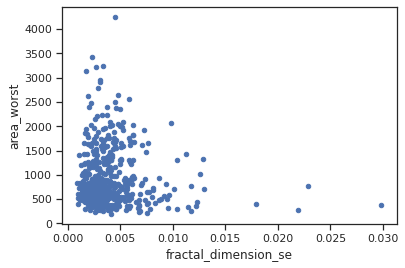

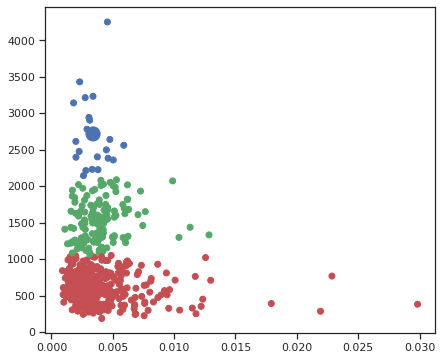

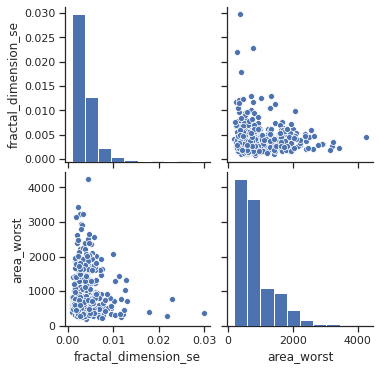

In [74]:
#@title Pick two columns for comparison { run: "auto" }

col1 = "fractal_dimension_se" #@param ["radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean", "compactness_mean", "concavity_mean", "concave_points_mean", "symmetry_mean", "fractal_dimension_mean", "radius_se", "texture_se", "perimeter_se", "area_se", "smoothness_se", "compactness_se", "concavity_se", "concave_points_se", "symmetry_se", "fractal_dimension_se", "radius_worst", "texture_worst", "perimeter_worst", "area_worst", "smoothness_worst", "compactness_worst", "concavity_worst", "concave_points_worst", "symmetry_worst", "fractal_dimension_worst"]
col2 = "area_worst" #@param ["radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean", "compactness_mean", "concavity_mean", "concave_points_mean", "symmetry_mean", "fractal_dimension_mean", "radius_se", "texture_se", "perimeter_se", "area_se", "smoothness_se", "compactness_se", "concavity_se", "concave_points_se", "symmetry_se", "fractal_dimension_se", "radius_worst", "texture_worst", "perimeter_worst", "area_worst", "smoothness_worst", "compactness_worst", "concavity_worst", "concave_points_worst", "symmetry_worst", "fractal_dimension_worst"]


features = [col1, col2]
df.plot(kind='scatter', x = features[0], y = features[1]);
# df[features].plot(kind='scatter', x=features[0],y=features[1]);
# Initialize an instance of the KMeans class from sklearn
model = KMeans(n_clusters=3,max_iter=1)
# Fit the instantianted model to df
model.fit(df[features].values)
# Assign clusters back to df
df['cluster'] = model.labels_
# Get our centroids
centroids = model.cluster_centers_
# turn them into a dataframe
cc = pd.DataFrame(centroids)
# Setup some colors for plotting
base_colors = ['r', 'g', 'b']
colors = [base_colors[centroid] for centroid in model.labels_]
# Plot the scatter of our points with calculated centroids
fig, ax = plt.subplots(figsize=(7,6))
ax.scatter(df[features[0]], df[features[1]], c=colors);
ax.scatter(cc[0], cc[1], c=base_colors, s=200);
# what's our silhouette score?
from sklearn import metrics
ss = metrics.silhouette_score(df, model.labels_, metric='euclidean')
print()
print("Silhouette score = ",ss)
print()

g = sns.pairplot(df[features])


In [0]:
df = df.drop('cluster',axis=1)

In [0]:
# K-Means with PCA
# Scale the data
from sklearn.preprocessing import StandardScaler
dfscaler = StandardScaler()
df_scaled = dfscaler.fit_transform(df)

df_scaled = pd.DataFrame(df_scaled, columns=['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst'])

radius_mean  texture_mean  ...  symmetry_worst  fractal_dimension_worst
0     1.097064     -2.073335  ...        2.750622                 1.937015
1     1.829821     -0.353632  ...       -0.243890                 0.281190
2     1.579888      0.456187  ...        1.152255                 0.201391
3    -0.768909      0.253732  ...        6.046041                 4.935010
4     1.750297     -1.151816  ...       -0.868353                -0.397100

[5 rows x 30 columns]

In [0]:
df1 = df_scaled
df2 = df_scaled
df3 = df_scaled
df1 = df1.drop(['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst'], axis=1)
df2 = df2.drop(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean','radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst'], axis=1)
df3 = df3.drop(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se'], axis=1)
mydf = pd.DataFrame()

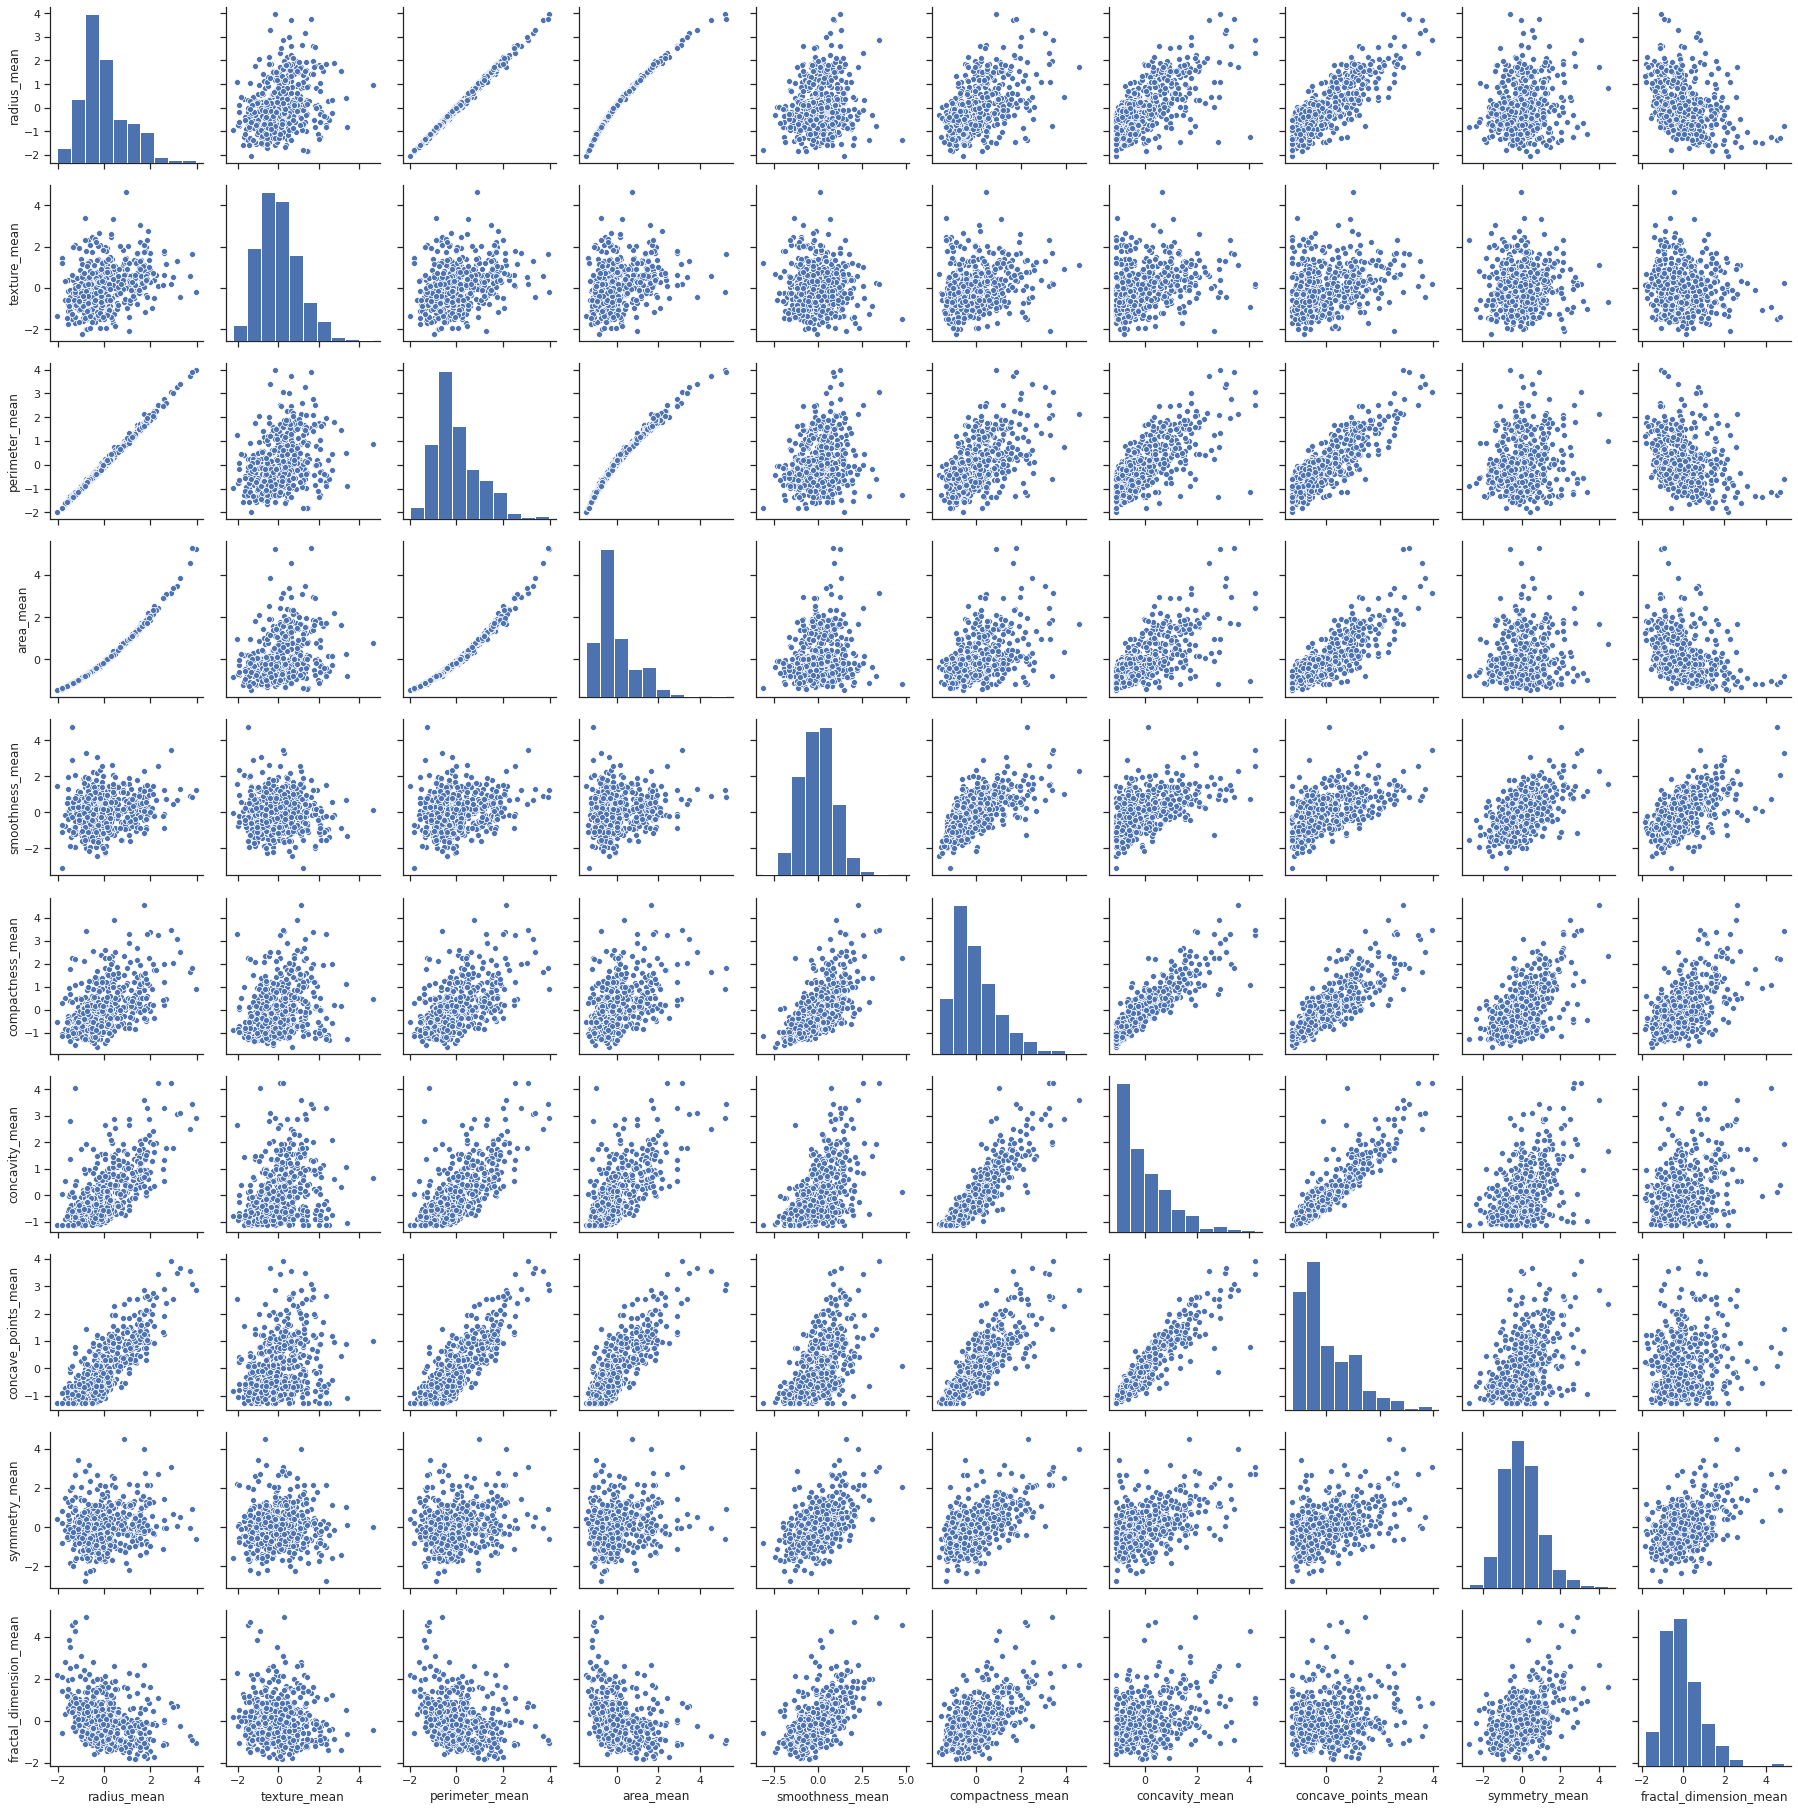

In [31]:
#  df1
g = sns.pairplot(df1)


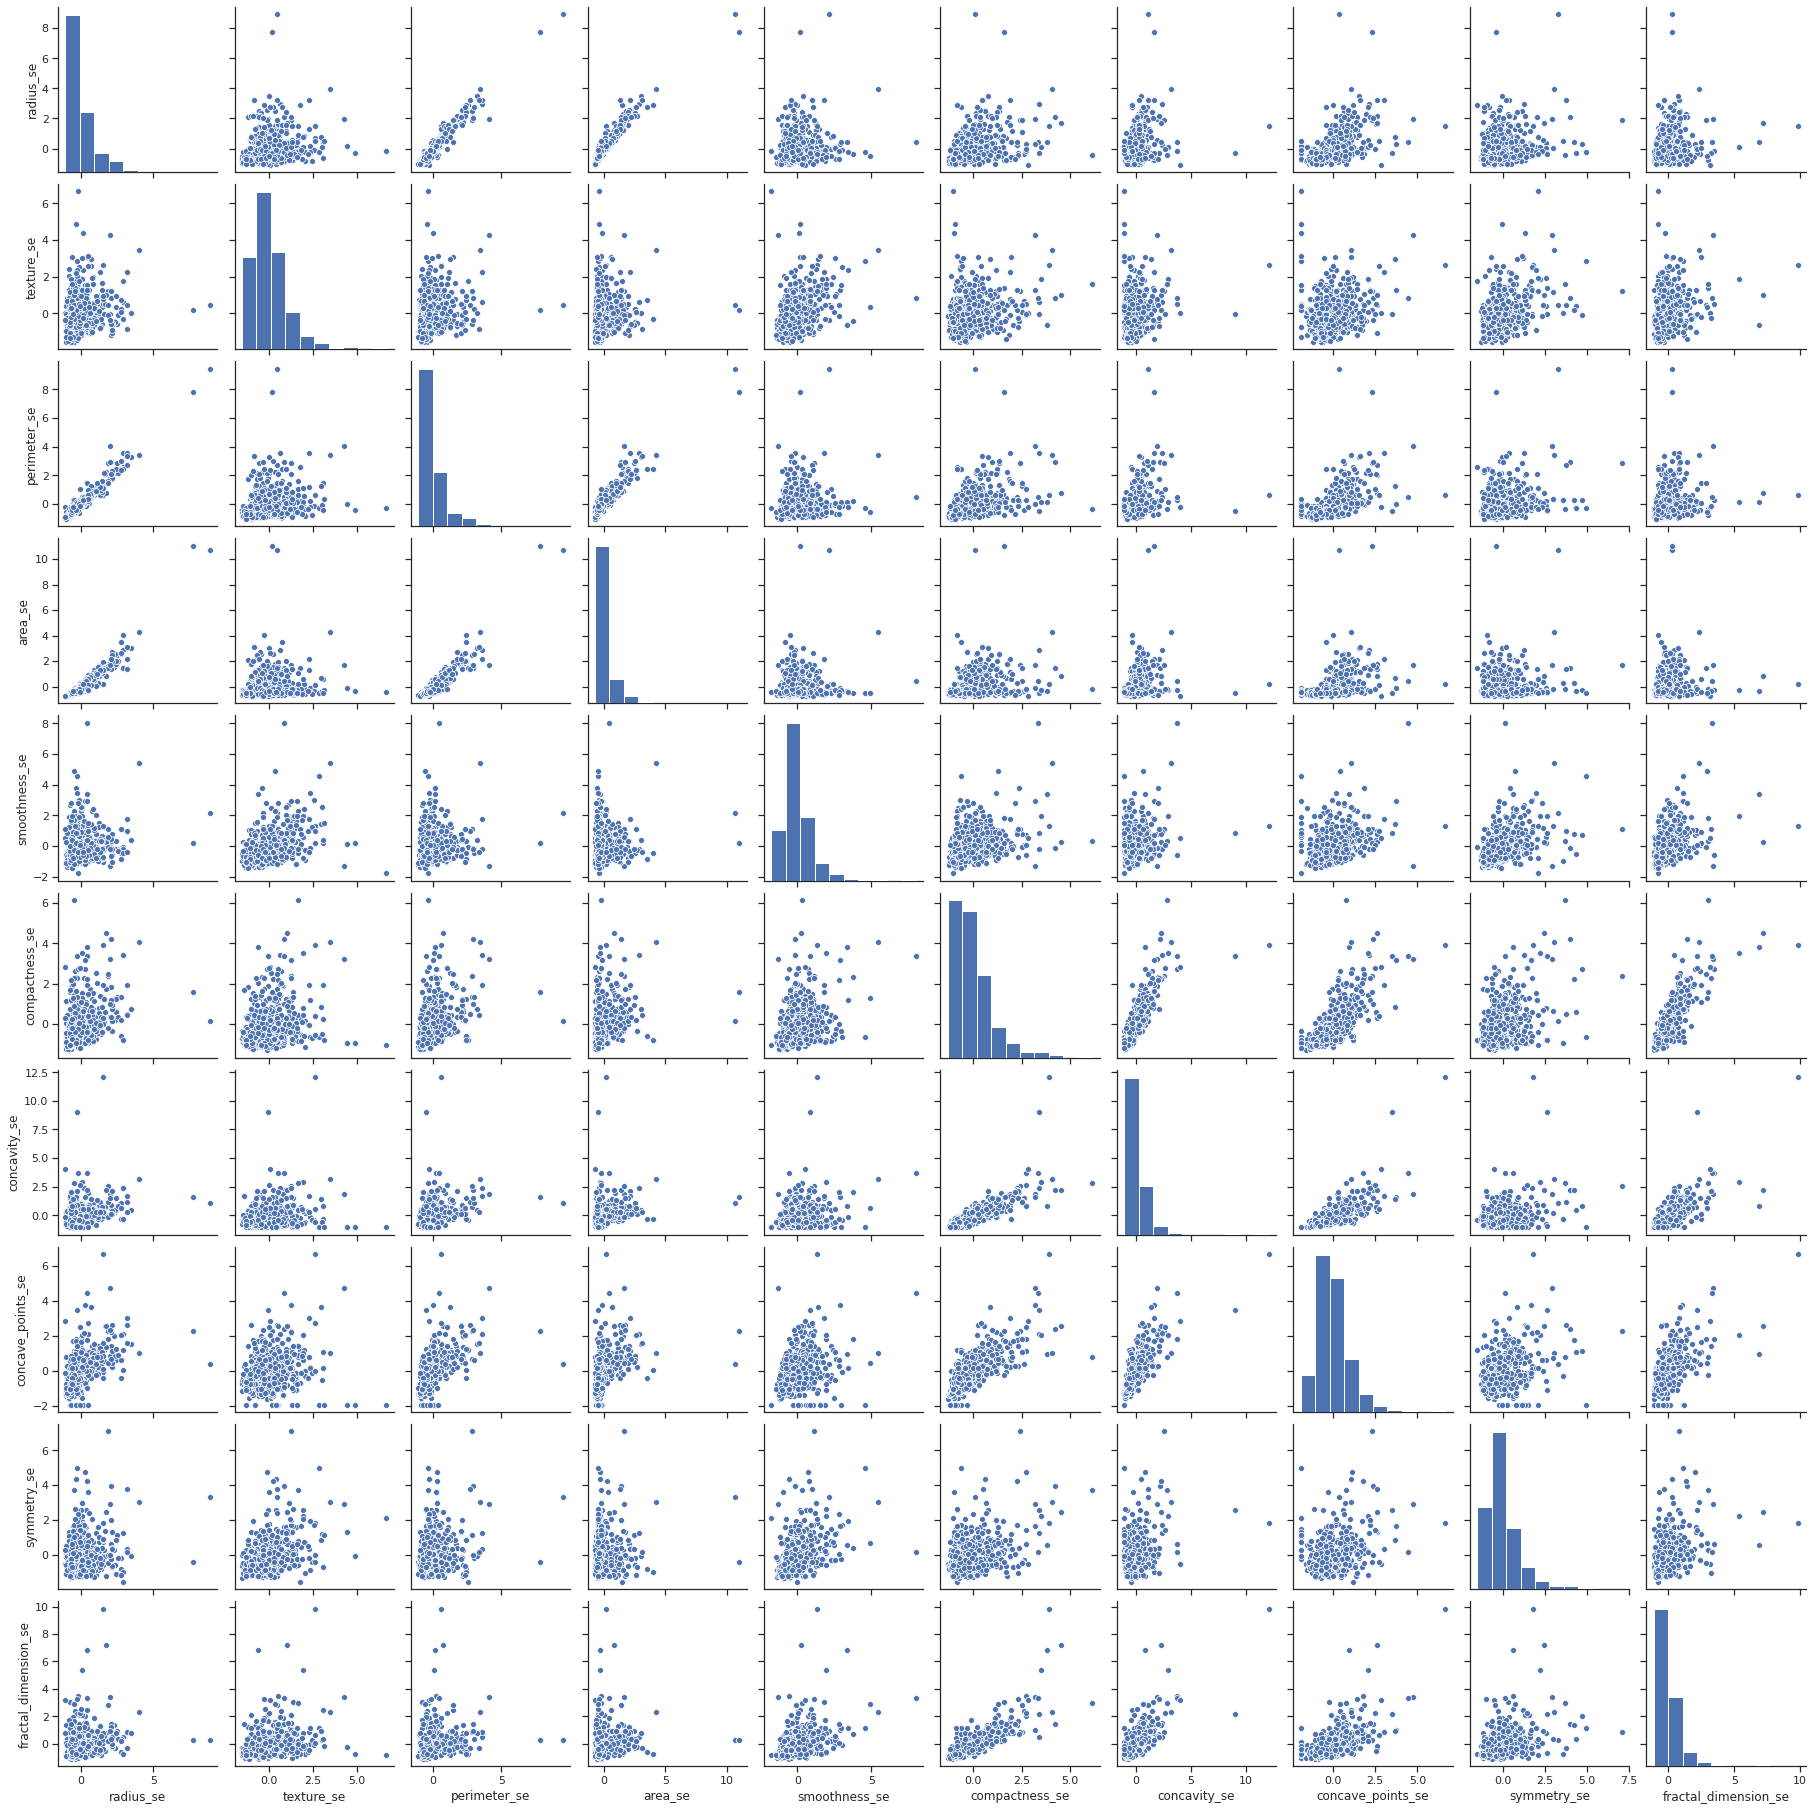

In [32]:
# df2
g = sns.pairplot(df2)


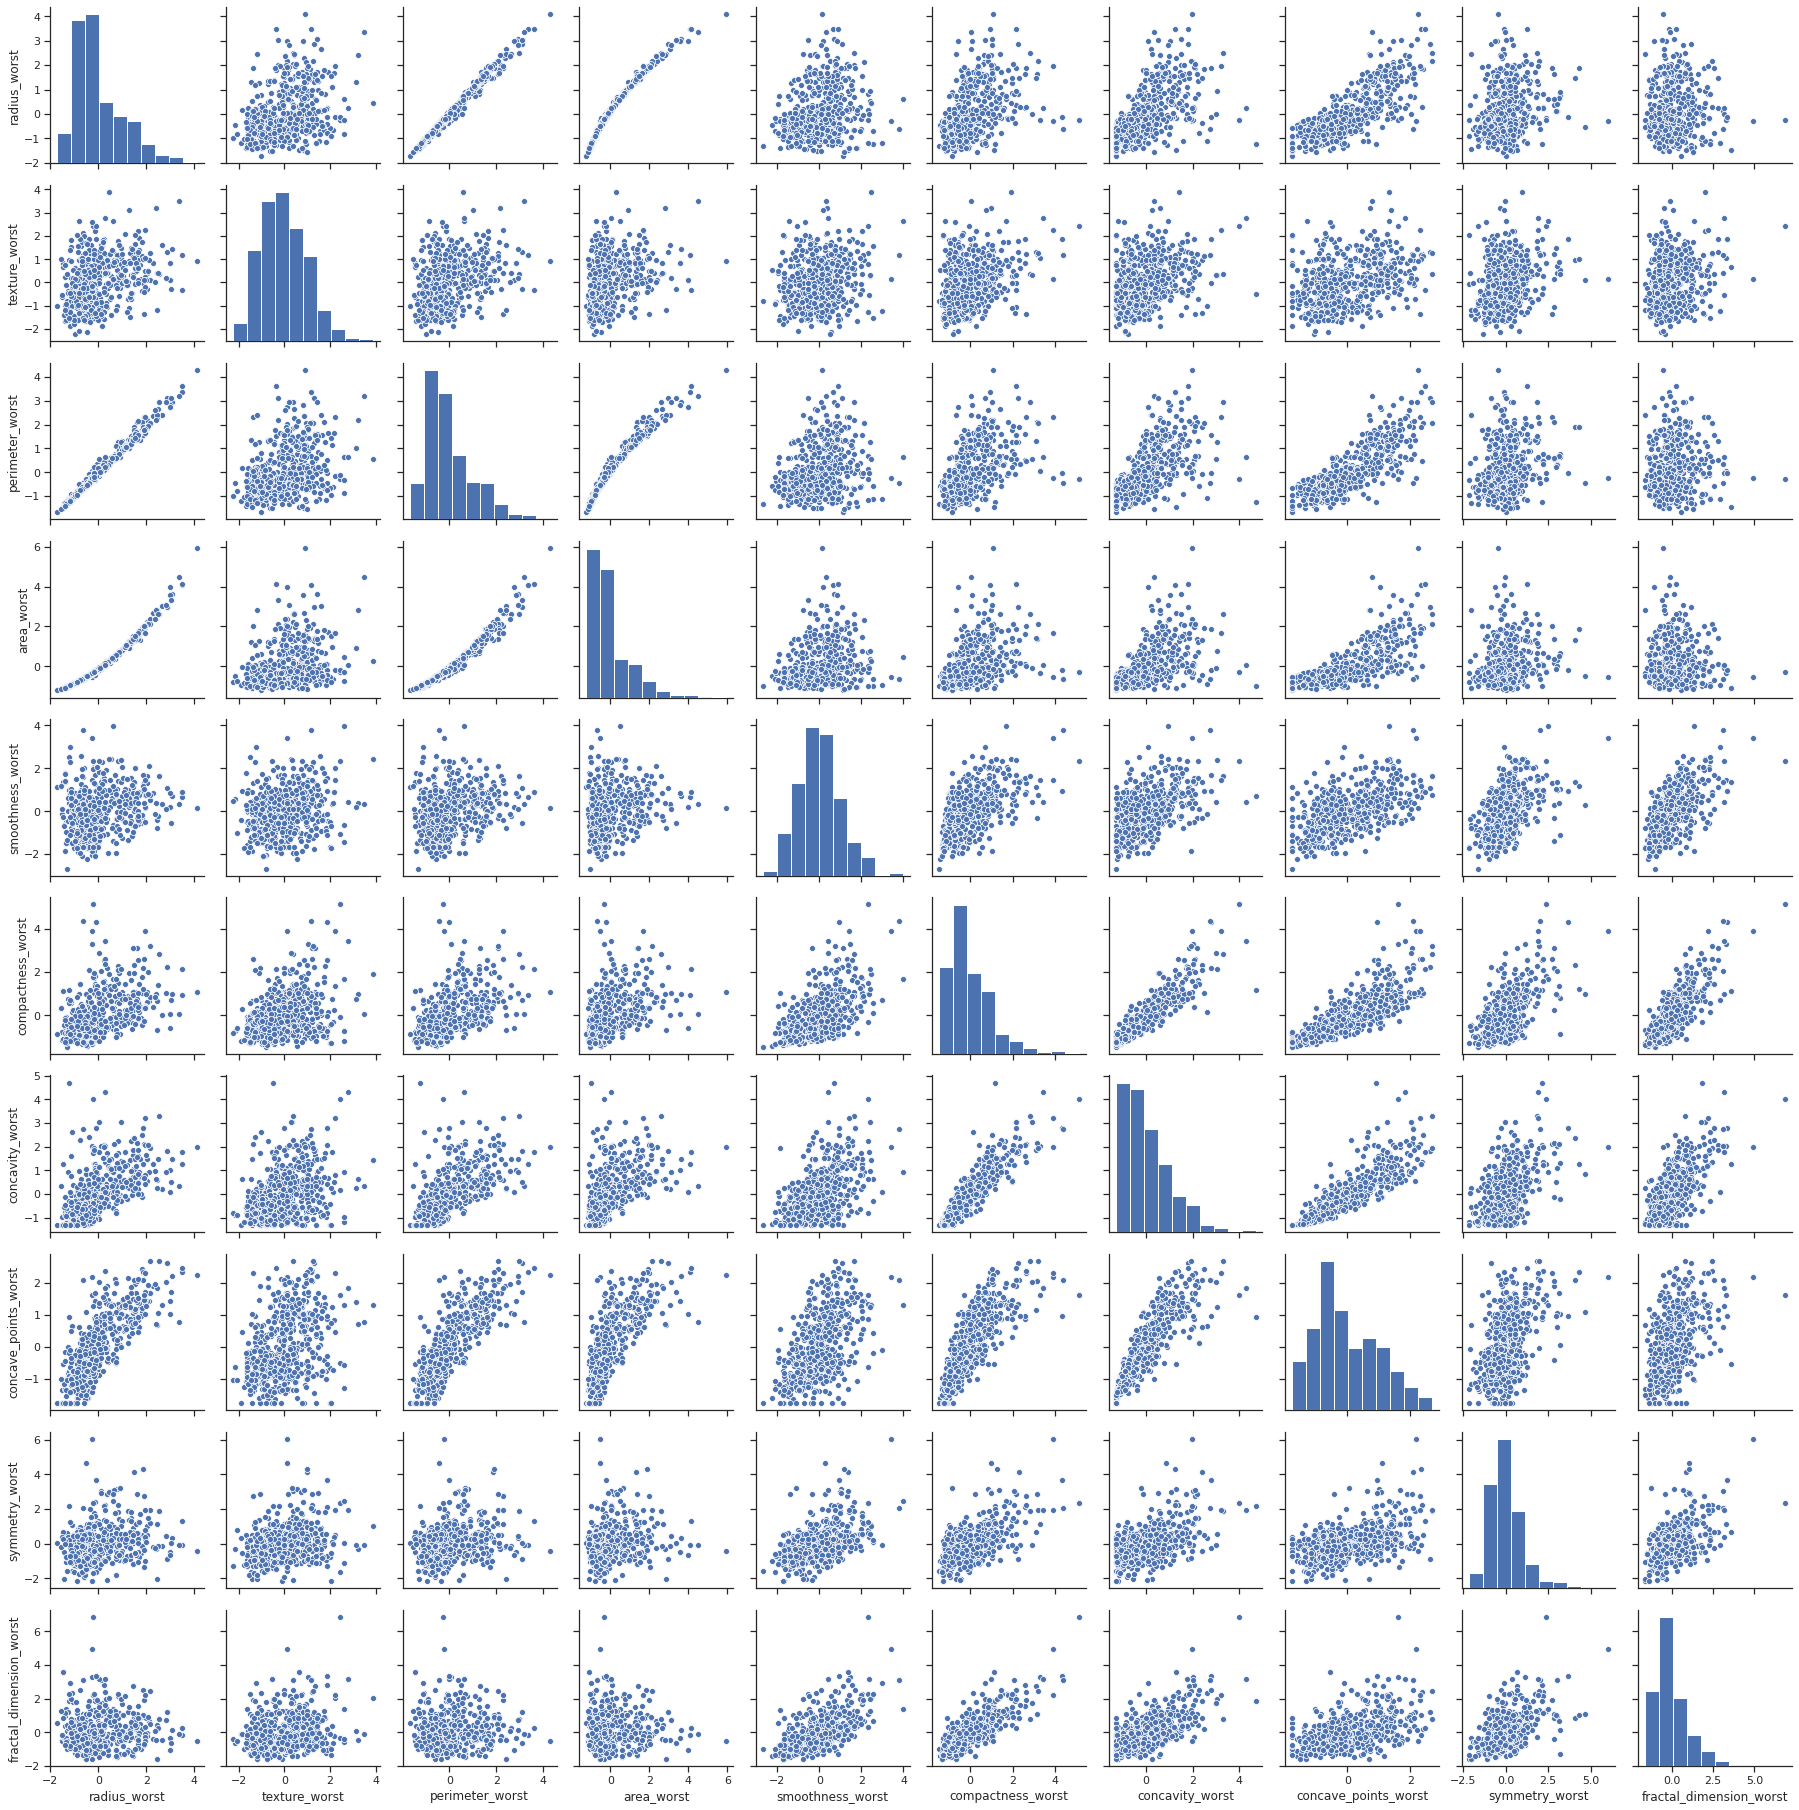

In [33]:
# df3
g = sns.pairplot(df3)


## Check you work: 

This is something that in a truly unsupervised learning situation **WOULD NOT BE POSSIBLE**. But for educational purposes go back and grab the true diagnosis column (label) from the original dataset. Take your cluster labels and compare them to the original diagnosis column. You can make scatterplots for each to see how they compare or you can calculate a percent accuracy score like: 
\begin{align}
\frac{\text{Num Correct Labels}}{\text{Num Total Observations}}
\end{align}

In [0]:
# Your Code Here

df1['diagnosis'] = df_diag
df2['diagnosis'] = df_diag
df3['diagnosis'] = df_diag


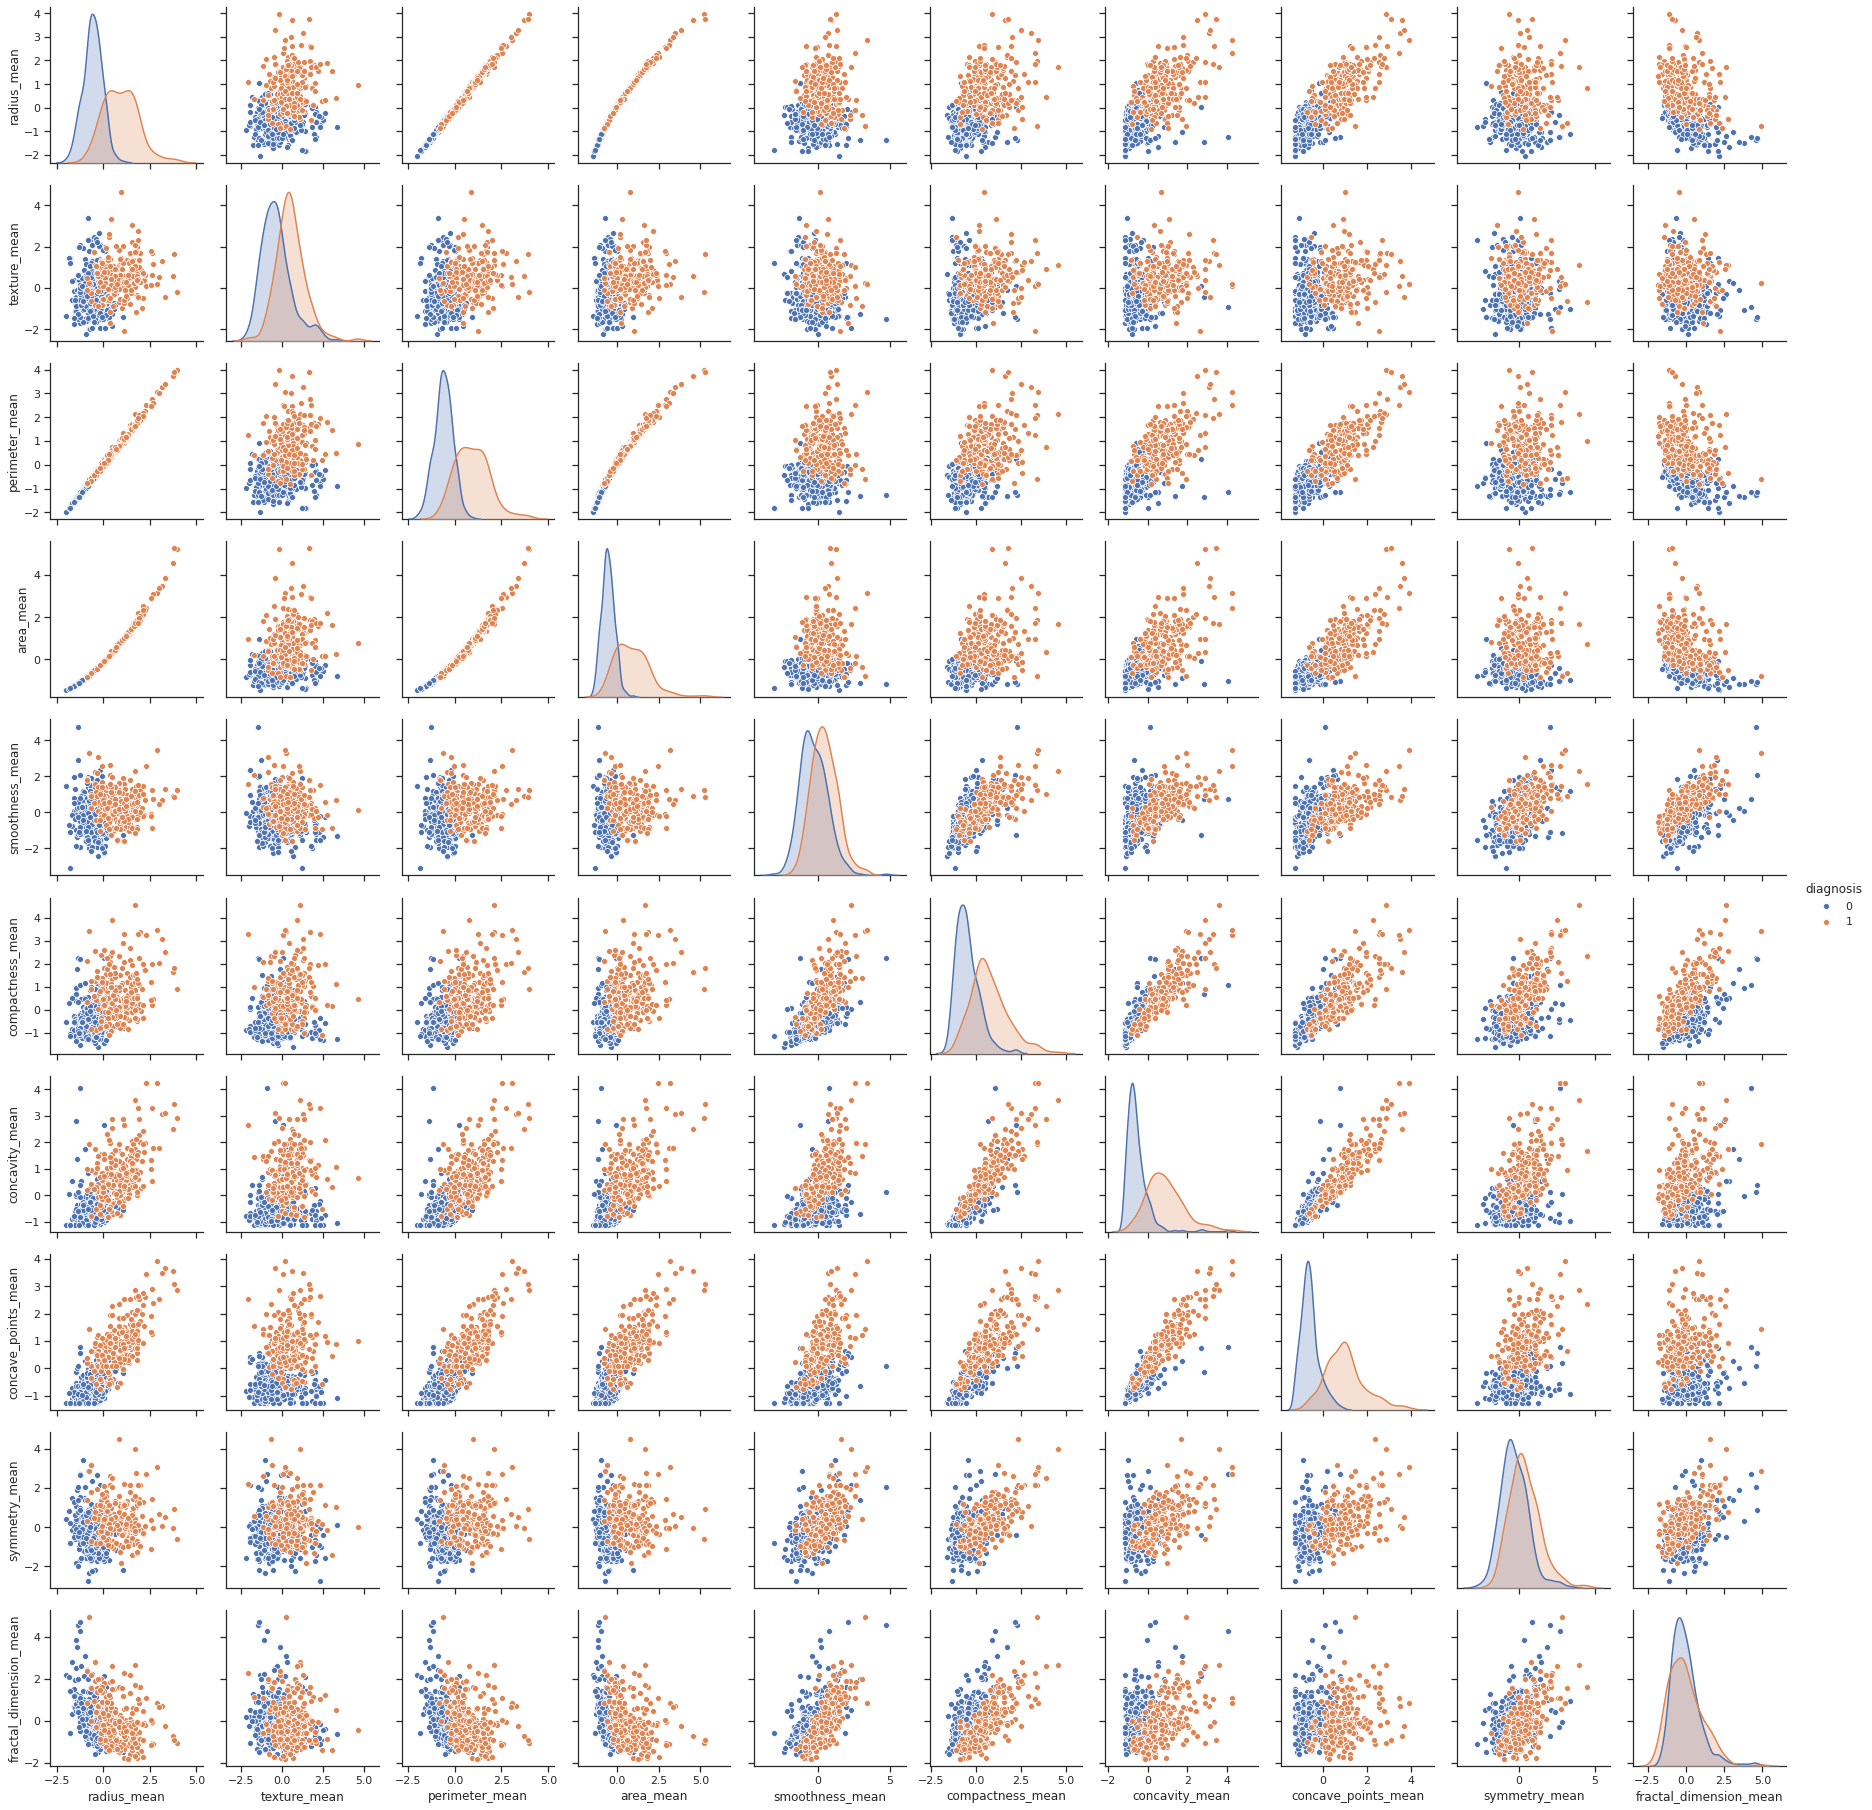

In [41]:
# df1

g = sns.pairplot(df1, hue = 'diagnosis')

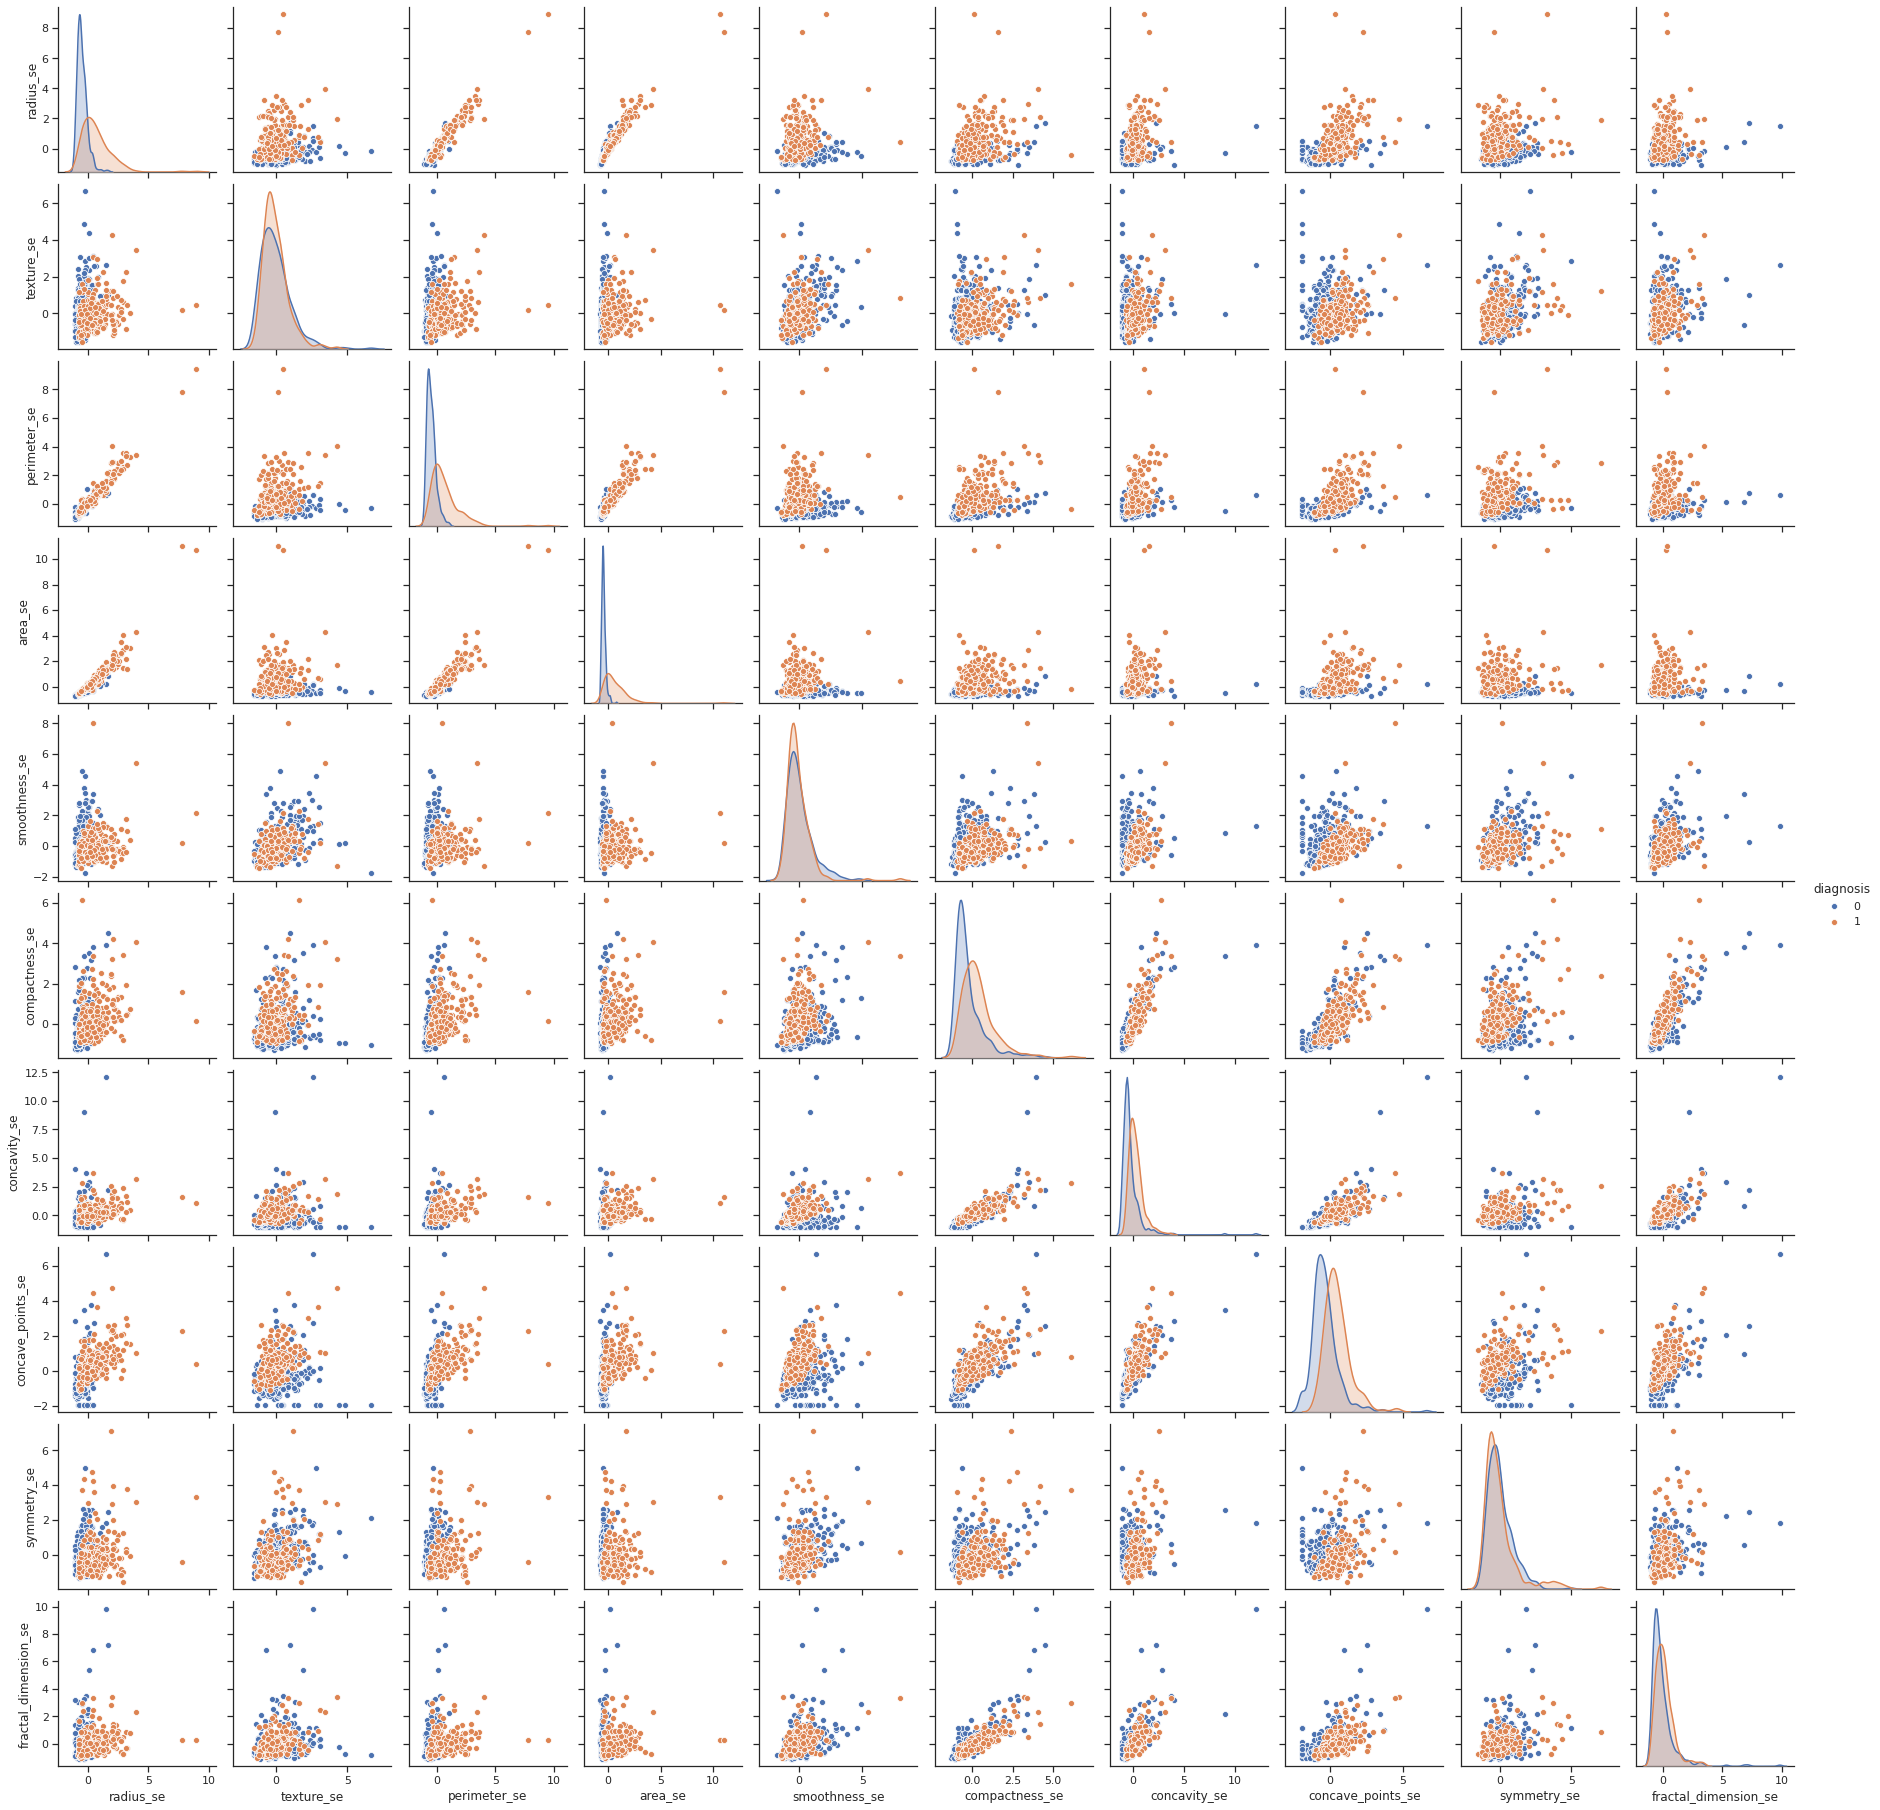

In [42]:
# df2
g = sns.pairplot(df2, hue = 'diagnosis')

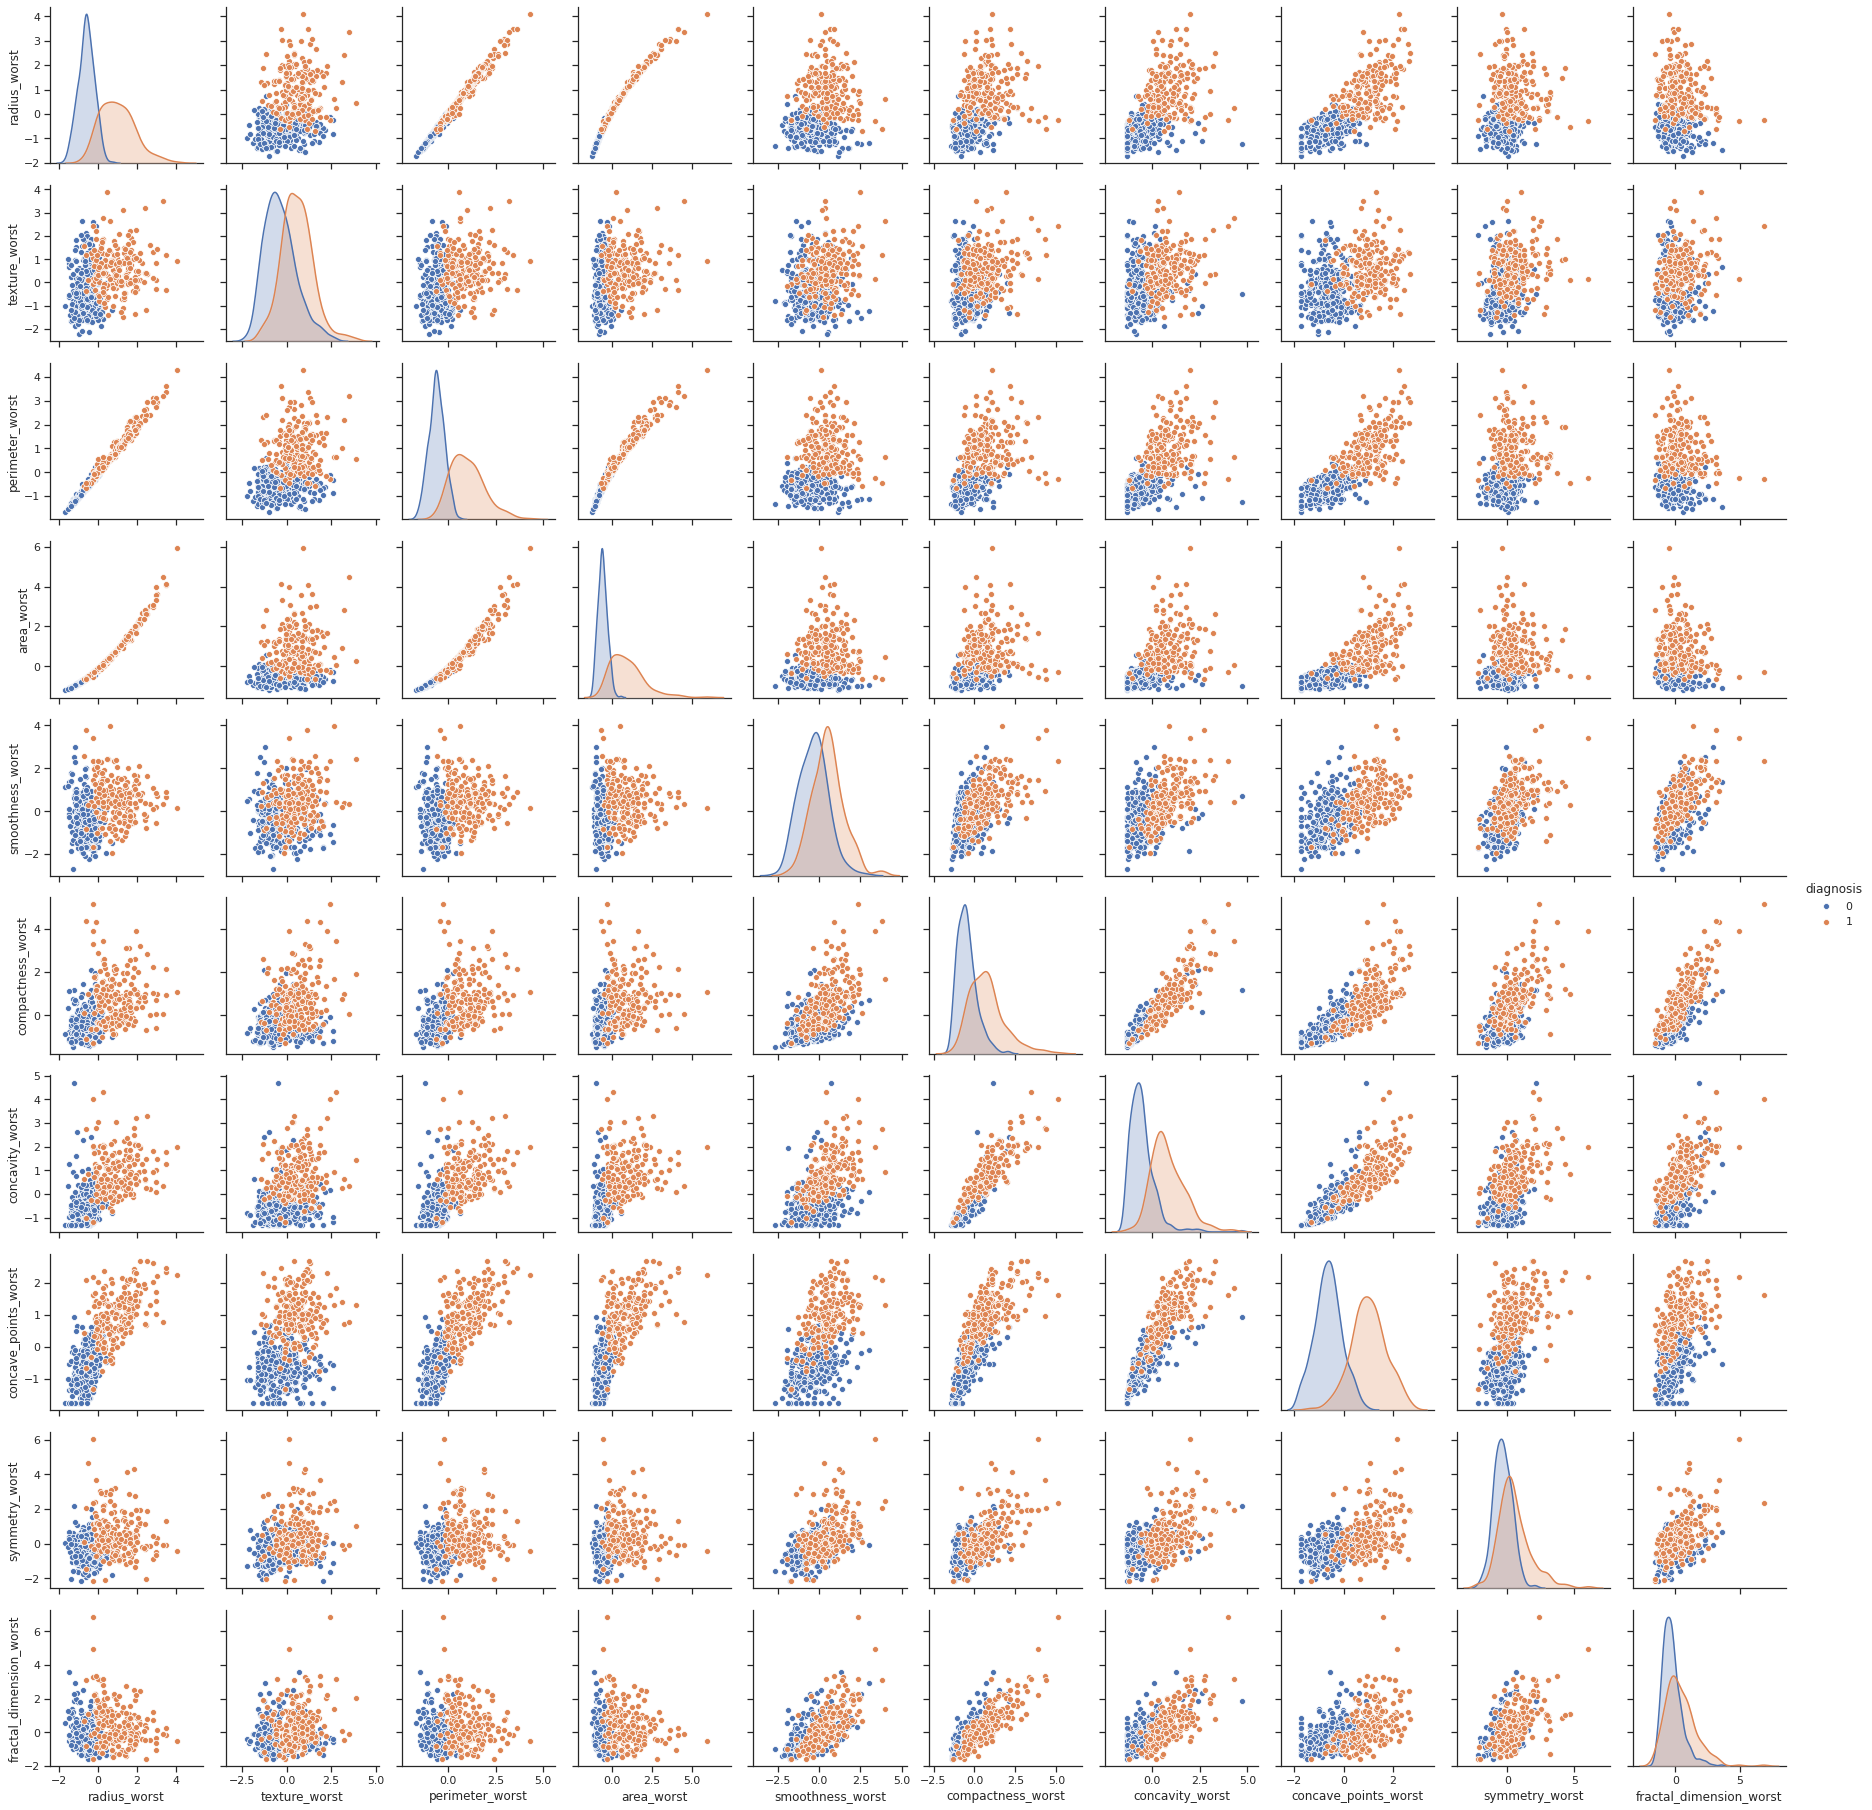

In [43]:
# df3
g = sns.pairplot(df3, hue = 'diagnosis')

# 2) Perform PCA on your dataset first and *then* use k-means clustering. 

- You need to standardize your data before PCA.
- First try clustering just on PC1 and PC2 so that you can make a scatterplot of your clustering.
- Then use use a scree plot to decide how many principal components to include in your clustering, and use however many principal components you need in order to retain 90% of the variation of the original dataset



In [0]:
##### Your Code Here #####




## Check your work: 

- Compare your PC1, PC2 clustering scatterplot to the clustering scatterplots you made on the raw data
- Calculate accuracy scores for both the PC1,PC2 Principal component clustering and the 90% of explained variance clustering.

How do your accuracy scores -when preprocessing the data with PCA- compare to the accuracy when simply clustering on the raw data?

# Stretch Goals:

- Study for the Sprint Challenge
- Work on your Data Storytelling Project